<a href="https://colab.research.google.com/github/umedjonbazarov/python_lab/blob/main/Bazarov_U_A-%22lab_1_np_pandas_matplotlib%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:

# Создаем матрицу A - шахматную из нулей и единиц, размера 6 на 3
A = np.tile([[1, 0, 1], [0, 1, 0]], (3, 2))[:6, :3]

# Создаем матрицу B - змейку из чисел от 1 до 24, размера 6 на 4
B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]  # Меняем порядок элементов в каждой второй строке

# Создаем матрицу C - случайные числа от 2 до 10, размера 4 на 3
C = np.random.randint(2, 11, (4, 3))

# Создаем матрицу D - единичную матрицу размера 4 на 4
D = np.eye(4, dtype=int)

# Формируем лоскутную матрицу S из A, B, C и D
S_upper = np.hstack((A, B))
S_lower = np.hstack((C, D))
S = np.vstack((S_upper, S_lower))

# Создаем матрицу F из нулей размера 10 на 2 и объединяем с S
F = np.zeros((10, 2), dtype=int)
G = np.hstack((S, F))

# Результат
print("Матрица A:\n", A)
print("Матрица B:\n", B)
print("Матрица C:\n", C)
print("Матрица D:\n", D)
print("Матрица S:\n", S)
print("Матрица G:\n", G)


Матрица A:
 [[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]
Матрица B:
 [[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]
Матрица C:
 [[ 7  3  7]
 [ 2  2  6]
 [ 9  6  7]
 [ 6  8 10]]
Матрица D:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Матрица S:
 [[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [ 7  3  7  1  0  0  0]
 [ 2  2  6  0  1  0  0]
 [ 9  6  7  0  0  1  0]
 [ 6  8 10  0  0  0  1]]
Матрица G:
 [[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 7  3  7  1  0  0  0  0  0]
 [ 2  2  6  0  1  0  0  0  0]
 [ 9  6  7  0  0  1  0  0  0]
 [ 6  8 10  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_closest(X, a):
    # Вычисляем разницу между каждым элементом матрицы и числом a
    diff = np.abs(X - a)
    # Находим индекс минимального значения в diff и используем его, чтобы найти ближайший элемент в X
    closest_element = X.flat[np.argmin(diff)]
    return closest_element


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
class StrangeNeuralNetwork:
    def __init__(self, A, b):
        self.A = A.astype(float)
        self.b = b.astype(float)

    def forward(self, X):
        A_squared = np.matmul(self.A, self.A)

        intermediate_vector = np.dot(A_squared, X)

        result = np.dot(intermediate_vector, self.b)

        return result

## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [7]:
def find_deep_sea_area(M):
    deep_sea = M < -5
    area = np.sum(deep_sea)
    return area

def find_water_volume(M):
    water_cells = M < 0
    total_volume = -np.sum(M[water_cells])
    return total_volume

def find_max_height(M):
    land_cells = M > 0
    if np.any(land_cells):
        max_height = np.max(M[land_cells])
    else:
        max_height = 0
    return max_height

In [8]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [9]:
def count_all_islands(a):
    a_padded = np.concatenate(([0], a))
    b = np.diff(a_padded)
    number_of_islands = np.sum(b == 1)
    return number_of_islands

In [10]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [11]:
def swap_mask_for_average(X, a):
    mean_value = np.mean(X)
    mean_value = np.floor(mean_value)
    X_copy = X.copy()
    mask = X_copy > a
    X_copy[mask] = mean_value
    return X_copy

In [12]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [13]:
def count_trace_diff(M):
    main_diagonal_sum = np.trace(M)
    secondary_diagonal_sum = np.trace(np.fliplr(M))
    difference = main_diagonal_sum - secondary_diagonal_sum
    return difference

In [14]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [15]:
def create_mountain(a):
    N = len(a)
    idx = np.concatenate((np.arange(N), np.arange(N-1, -1, -1)))
    M = a[idx[:, None]] + a[idx[None, :]]
    return M

In [16]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [17]:
def custom_blur(P, C):
    N, M = P.shape
    P = P.astype(np.float64)
    S = np.pad(P, ((1, 0), (1, 0)), mode='constant', constant_values=0)
    S = S.cumsum(axis=0).cumsum(axis=1)
    total_sums = (S[C:, C:] - S[:-C, C:] - S[C:, :-C] + S[:-C, :-C])
    result = total_sums / (C * C)
    return result

In [18]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [19]:
def check_successful_broadcast(*matrices):
    shapes = matrices

    max_ndim = max(len(shape) for shape in shapes)

    padded_shapes = []
    for shape in shapes:
        pad_width = max_ndim - len(shape)
        padded_shape = (1,) * pad_width + shape
        padded_shapes.append(padded_shape)

    for dims in zip(*padded_shapes):
        unique_dims = set(dims) - {1}
        if len(unique_dims) > 1:
            return False
    return True

In [20]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [21]:
def pairwise_distances(A, B):
    return np.sqrt(np.sum(A**2, axis=1)[:, np.newaxis] +
                   np.sum(B**2, axis=1)[np.newaxis, :] -
                   2 * np.dot(A, B.T))

In [23]:
A = np.array([[1, 2], [3, 4], [5, 6]])   # Shape: (3, 2)
B = np.array([[7, 8], [9, 10]])          # Shape: (2, 2)


pairwise_distances(A, B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

1. **Вычисление квадратов норм строк:**
   - `np.sum(A**2, axis=1)[:, np.newaxis]` вычисляет квадраты евклидовых норм (сумму квадратов) каждой строки в `A` и преобразует результат в вектор-столбец формы `(m, 1)`.
   - `np.sum(B**2, axis=1)[np.newaxis, :]` вычисляет квадраты норм каждой строки в `B` и преобразует их в вектор-строку формы `(1, n)`.

2. **Вычислить перекрестный член:**
   - `2 * np.dot(A, B.T)` вычисляет дважды скалярное произведение между строками `A` и `B`. В результате получается матрица размером `(m, n)`, содержащая попарные скалярные произведения.

3. **Вычислить попарные квадраты расстояний:**
   - Выражение `A_norms + B_norms - 2 * A_dot_B` объединяет эти термины для вычисления квадратов евклидовых расстояний между всеми парами строк с использованием трансляции для выравнивания размеров.

4. **Извлеките квадратный корень, чтобы получить расстояния:**
   - `np.sqrt(...)` вычисляет поэлементный квадратный корень из квадратов расстояний для получения итоговой матрицы евклидовых расстояний размером `(m, n)`.

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)*Курсив*

In [78]:

url = 'https://drive.google.com/uc?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [79]:
data.rename(columns={
    'Unnamed: 0': 'Unnamed:0',
    't, sec': 't',
    'sigma_t, sec': 'sigma_t',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'phi'
}, inplace=True)

data['mass'] = data['mass'] / 1000

data['length'] = data['length'] / 100

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,Unnamed:0,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [83]:

data['omega'] = 2 * np.pi * data['N'] / data['t']

data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']

data['omega_down'] = data['phi'] / data['t']

data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']

g = 980

data['momentum'] = data['mass'] * g * data['length']

data['momentum_down'] = data['mass'] * data['phi'] * data['length']**2 / data['t']**2

data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()

,Unnamed:0,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,213.444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,213.444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,213.444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,213.444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,213.444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [84]:
data['mass'] = data['mass'].round(3)
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()


assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,168.3836,4.108862e-07
0.180,0.094012,0.000352,213.4440,6.202853e-07
0.216,0.081687,0.000354,228.6144,7.755223e-07
0.273,0.143300,0.000817,326.3988,2.166527e-06
0.341,0.150752,0.000723,367.5980,1.577406e-06
0.614,0.185194,0.000910,667.9092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

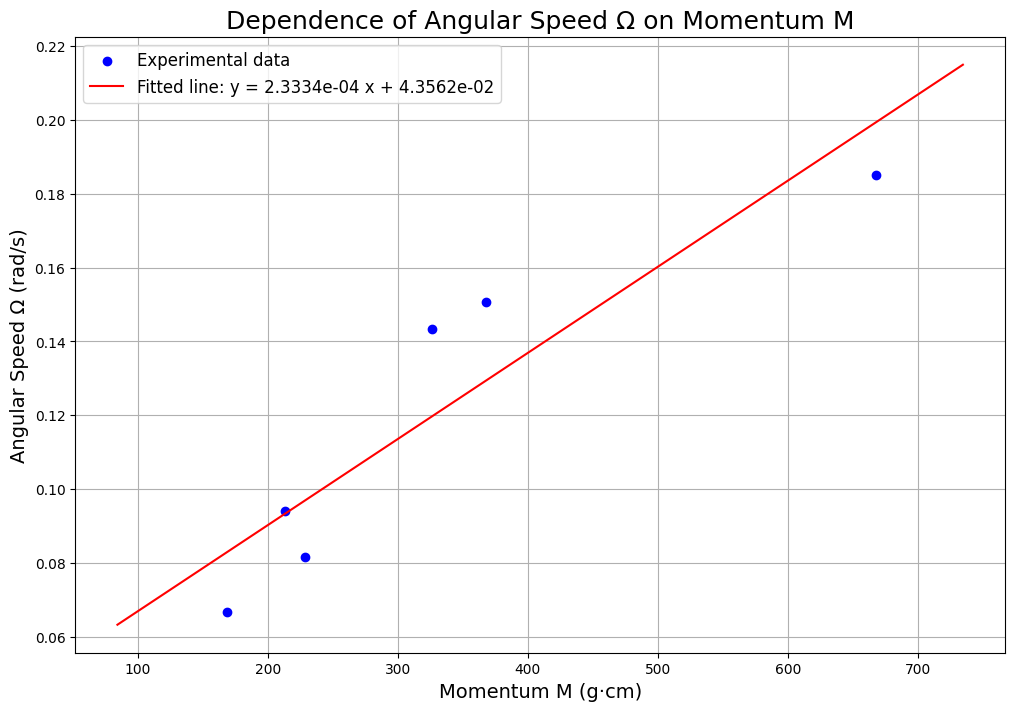

In [87]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)


y_lsq = np.polyval(coefs, x_lsq)


fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_np, omega_np, color='blue', label='Experimental data')

plt.plot(x_lsq, y_lsq, color='red', label=f'Fitted line: y = {coefs[0]:.4e} x + {coefs[1]:.4e}')
plt.xlabel('Momentum M (g·cm)', fontsize=14)
plt.ylabel('Angular Speed Ω (rad/s)', fontsize=14)

plt.grid(True)

plt.title('Dependence of Angular Speed Ω on Momentum M', fontsize=18)

plt.legend(fontsize=12)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [93]:
grouped_data = grouped_data.assign(**data.groupby('mass')[['sigma_down', 'sigma_momentum']].mean())
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

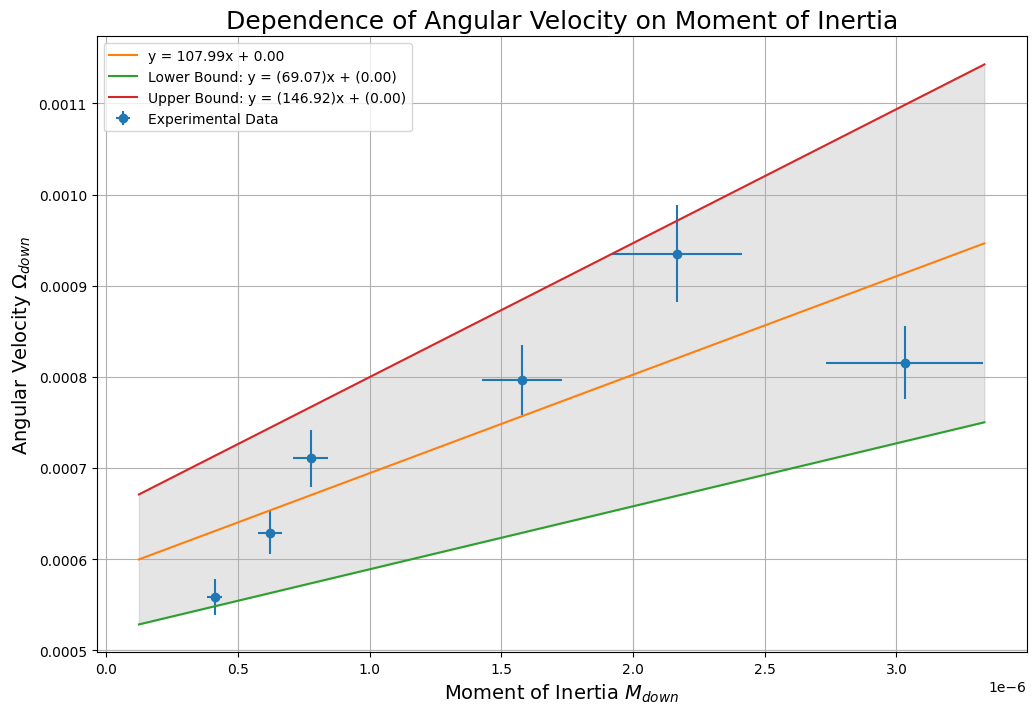

In [95]:
grouped_data = grouped_data.assign(
    omega_down=data.groupby('mass')['omega_down'].mean()
)

omega_down_values = grouped_data['omega_down'].to_numpy()
momentum_down_values = grouped_data['momentum_down'].to_numpy()
omega_down_errors = grouped_data['sigma_down'].to_numpy()
momentum_down_errors = grouped_data['sigma_momentum'].to_numpy()


coefficients, covariance_matrix = np.polyfit(
    momentum_down_values, omega_down_values, deg=1, cov=True
)


x_fit = np.linspace(
    momentum_down_values.min() * 0.3, momentum_down_values.max() * 1.1, 100
)

coeff_std_devs = np.sqrt(np.diag(covariance_matrix))

y_fit = np.polyval(coefficients, x_fit)
y_fit_lower = np.polyval(coefficients - coeff_std_devs, x_fit)
y_fit_upper = np.polyval(coefficients + coeff_std_devs, x_fit)

plt.figure(figsize=(12, 8))

plt.errorbar(
    momentum_down_values, omega_down_values,
    xerr=momentum_down_errors, yerr=omega_down_errors,
    fmt='o', label='Experimental Data'
)

plt.plot(x_fit, y_fit, label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.plot(
    x_fit, y_fit_lower,
    label=f'Lower Bound: y = ({coefficients[0] - coeff_std_devs[0]:.2f})x + ({coefficients[1] - coeff_std_devs[1]:.2f})'
)
plt.plot(
    x_fit, y_fit_upper,
    label=f'Upper Bound: y = ({coefficients[0] + coeff_std_devs[0]:.2f})x + ({coefficients[1] + coeff_std_devs[1]:.2f})'
)

plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='gray', alpha=0.2)

plt.xlabel('Moment of Inertia $M_{down}$', fontsize=14)
plt.ylabel('Angular Velocity $\\Omega_{down}$', fontsize=14)
plt.title('Dependence of Angular Velocity on Moment of Inertia', fontsize=18)

plt.grid(True)
plt.legend(loc='best')

plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [96]:
sns.set_style("darkgrid")

In [105]:
iris = pd.read_csv('Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:

iris.drop(columns=['Id'], inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [108]:
print(iris['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

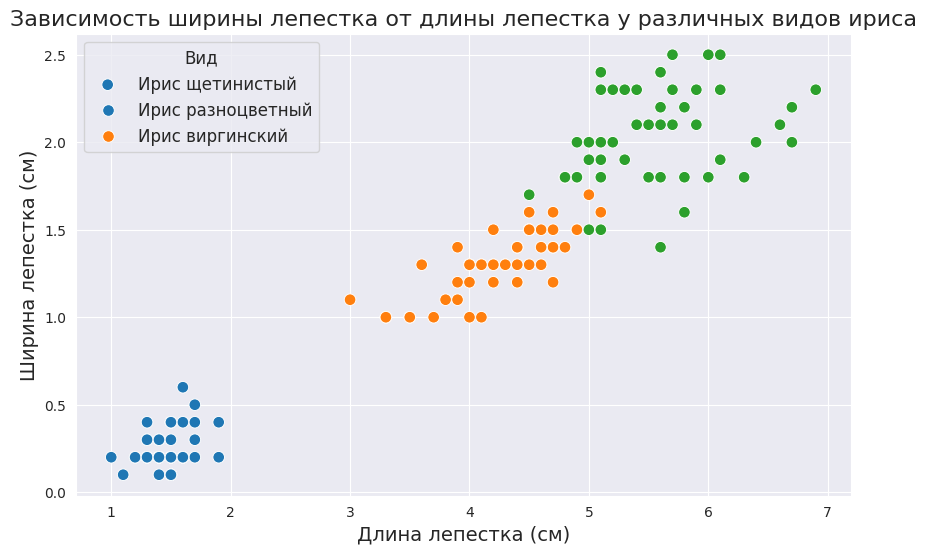

In [110]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', s=70)

plt.xlabel('Длина лепестка (см)', fontsize=14)
plt.ylabel('Ширина лепестка (см)', fontsize=14)
plt.title('Зависимость ширины лепестка от длины лепестка у различных видов ириса', fontsize=16)

plt.legend(title='Вид', labels=['Ирис щетинистый', 'Ирис разноцветный', 'Ирис виргинский'], fontsize=12, title_fontsize=12)

plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

**Scatterplot (sns.scatterplot):**
   - **Преимущества:**
     - Простота использования и понимания.
     - Хорошо подходит для первичного анализа и быстрого визуального представления данных.
     - Легко добавить цветовую кодировку по категориям (видам).
   - **Недостатки:**
     - Не предоставляет дополнительной информации о распределении данных.
     - Меньше возможностей для настройки и детального анализа.

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

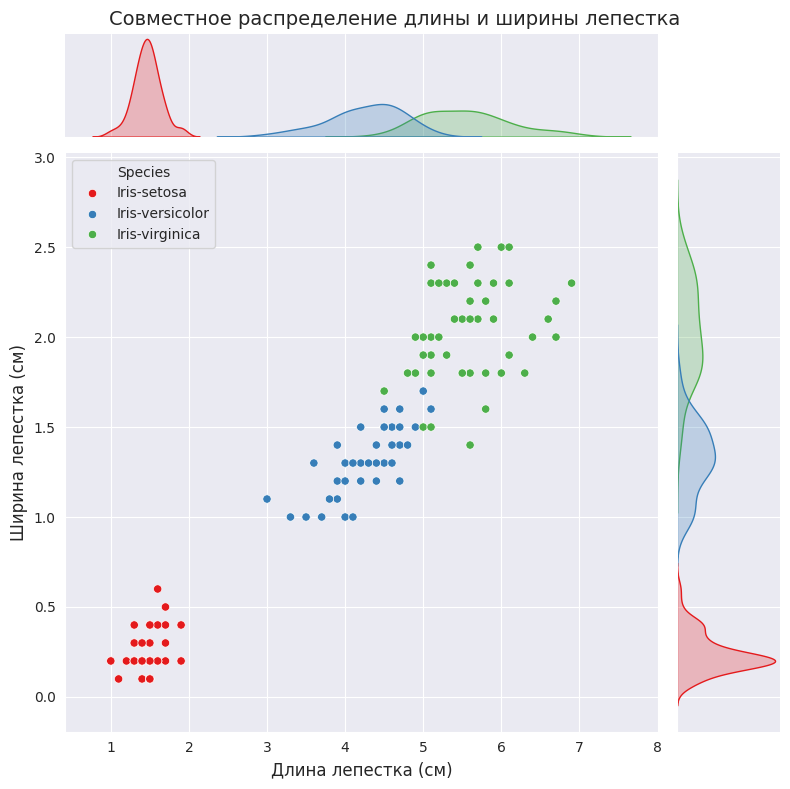

In [111]:
sns.set_style("darkgrid")

sns.jointplot(
    data=iris,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Species',
    kind='scatter',
    height=8,
    palette='Set1'
)

plt.xlabel('Длина лепестка (см)', fontsize=12)
plt.ylabel('Ширина лепестка (см)', fontsize=12)

plt.suptitle('Совместное распределение длины и ширины лепестка', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()

**Какие** выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

**Выводы из графиков:**

1. **Зависимость между длиной и шириной лепестка:**
   - Во всех трех графиках наблюдается сильная положительная корреляция между длиной и шириной лепестка. Это означает, что по мере увеличения длины лепестка увеличивается и его ширина.
   - Это явление характерно для всех трех видов ириса, хотя степень корреляции может немного различаться между видами.

2. **Распределение данных:**
   - **Jointplot** позволяет увидеть не только корреляцию между признаками, но и распределение каждого признака отдельно.
   - Гистограммы на осях показывают, что распределение длины и ширины лепестков для каждого вида отличается:
     - **Ирис щетинистый** имеет узкое распределение с меньшими значениями.
     - **Ирис разноцветный** и **Ирис виргинский** имеют более широкие распределения, которые частично перекрываются.


**Сравнение методов визуализации:**

1. **Scatterplot (sns.scatterplot):**
   - **Преимущества:**
     - Простота использования и понимания.
     - Хорошо подходит для первичного анализа и быстрого визуального представления данных.
     - Легко добавить цветовую кодировку по категориям (видам).
   - **Недостатки:**
     - Не предоставляет дополнительной информации о распределении данных.
     - Меньше возможностей для настройки и детального анализа.

2. **Jointplot (sns.jointplot):**
   - **Преимущества:**
     - Совмещает в себе график рассеяния и гистограммы распределения по осям.
     - Позволяет увидеть как взаимосвязь между признаками, так и распределение каждого признака отдельно.
     - Полезен для выявления особенностей распределения данных и наличия выбросов.
   - **Недостатки:**
     - Меньше возможностей для кастомизации.
     - При добавлении параметра `hue` (для разделения по категориям) легенда может отображаться некорректно или отсутствовать.
     - Подходит для парных сравнений, но может быть менее информативен при большом количестве категорий.

3. **FacetGrid (sns.FacetGrid):**
   - **Преимущества:**
     - Высокая гибкость и возможность создания сложных многомерных визуализаций.
     - Позволяет создавать сетку графиков по заданным категориям, что облегчает сравнение между группами.
     - Легко настраивать внешний вид и добавлять дополнительные элементы (например, линии регрессии).
   - **Недостатки:**
     - Требует больше кода и понимания для настройки.
     - Может быть избыточен для простых визуализаций.



## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

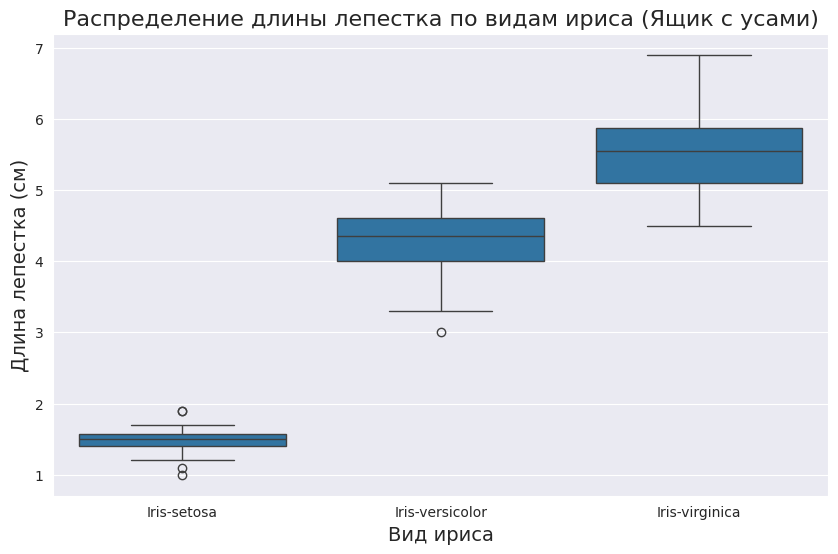

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

plt.xlabel('Вид ириса', fontsize=14)
plt.ylabel('Длина лепестка (см)', fontsize=14)
plt.title('Распределение длины лепестка по видам ириса (Ящик с усами)', fontsize=16)

plt.show()

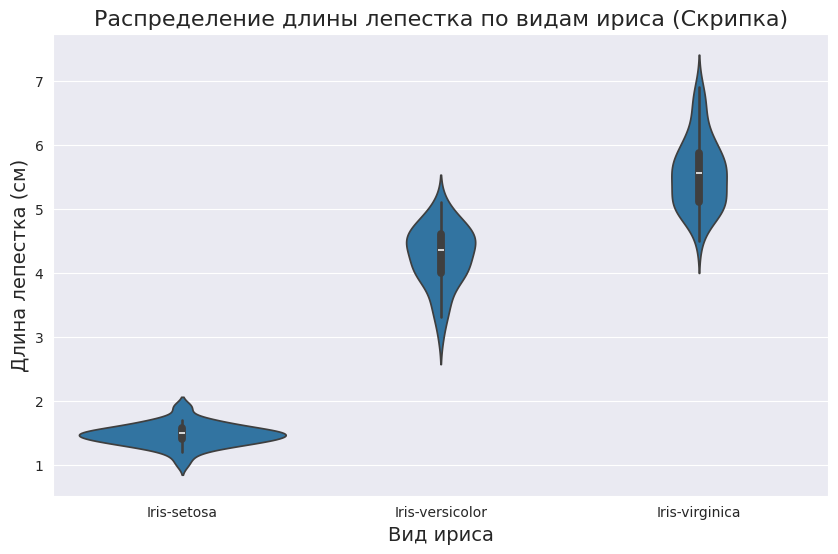

In [113]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

plt.xlabel('Вид ириса', fontsize=14)
plt.ylabel('Длина лепестка (см)', fontsize=14)
plt.title('Распределение длины лепестка по видам ириса (Скрипка)', fontsize=16)

plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

### Сравнение графиков и анализ

**1. Информативность:**

- **Boxplot ("Ящик с усами"):**
  - **Преимущества:**
    - Отображает медиану, квартильные диапазоны (25-й и 75-й процентили) и возможные выбросы.
    - Позволяет быстро оценить центральную тенденцию и разброс данных.
    - Хорошо подходит для сравнения распределений между категориями.
  - **Недостатки:**
    - Не показывает форму распределения (например, симметричность, наличие нескольких мод).
    - Менее информативен для небольших выборок.

- **Violin Plot (Виолин-плот):**
  - **Преимущества:**
    - Сочетает в себе свойства boxplot и оценку ядра плотности распределения (KDE).
    - Отображает форму распределения, включая моду или несколько мод.
    - Позволяет увидеть, где данные наиболее сконцентрированы.
  - **Недостатки:**
    - Может быть сложнее интерпретировать для людей, не знакомых с этим типом графиков.
    - Ширина "виолины" может вводить в заблуждение относительно количества данных.

**2. Визуальная привлекательность:**

- **Boxplot:**
  - Прост и понятен.
  - Менее загружен визуально.
  - Подходит для формальных отчетов и презентаций.

- **Violin Plot:**
  - Более эстетичен и привлекателен благодаря симметричной форме.
  - Привлекает внимание и может быть более интересен для аудитории.
  - Подходит для публикаций и презентаций, где важна визуальная привлекательность.

**3. Полученная информация из графиков:**

- **Общие наблюдения:**
  - **Iris setosa** имеет значительно меньшую длину лепестка по сравнению с другими видами.
  - **Iris versicolor** и **Iris virginica** имеют перекрывающиеся диапазоны длины лепестка, но медианные значения различаются.

- **Boxplot:**
  - Позволяет увидеть медиану и межквартильный размах.
  - Выявляет выбросы в данных (если они есть).

- **Violin Plot:**
  - Показывает распределение данных по длине лепестка.
  - Можно заметить, что у **Iris virginica** распределение более растянутое, что указывает на большую вариативность длины лепестка.
  - У **Iris setosa** распределение узкое и симметричное.

### Выводы:

- **Какой график более информативный?**
  - **Violin Plot** более информативен, так как предоставляет дополнительную информацию о форме распределения данных. Он позволяет увидеть особенности распределения, которые не видны на boxplot, такие как многомодальность или асимметрия.

- **Какой график более красивый визуально?**
  - Это субъективно, но многие могут считать **Violin Plot** более привлекательным из-за его эстетической формы и визуальной сложности. Однако, для тех, кто предпочитает простоту и ясность, **Boxplot** может показаться более подходящим.

- **Информация, полученная из графиков:**
  - Различия в длине лепестка между видами ириса.
  - Вариативность и разброс данных внутри каждого вида.
  - Форма распределения длины лепестка для каждого вида.
  - Возможность выявления выбросов или аномальных значений.



## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

<Figure size 1200x1000 with 0 Axes>

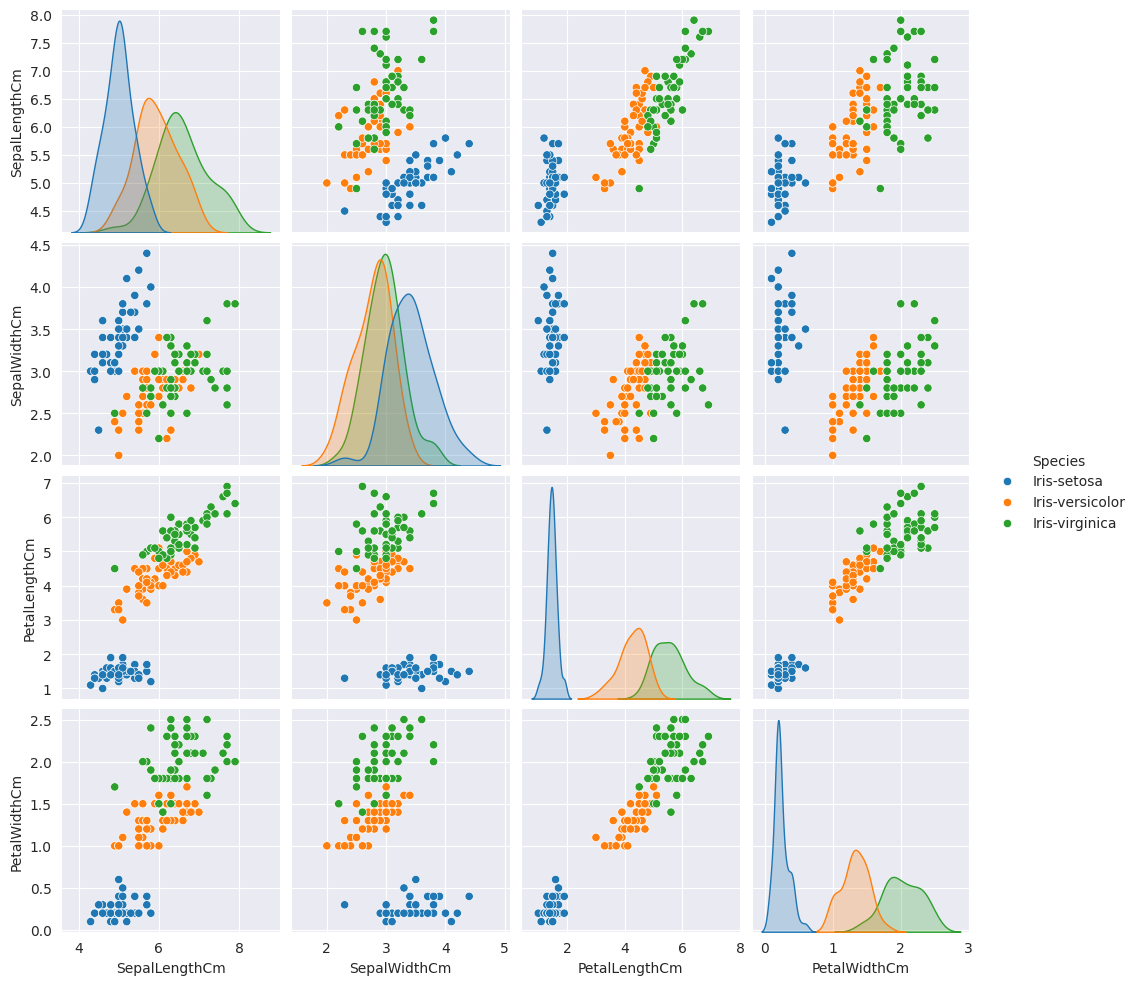

In [114]:
plt.figure(figsize=(12, 10))
sns.pairplot(iris, hue='Species', diag_kind='kde')
plt.show()

# Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Из полученного графика pairplot можно почерпнуть следующую информацию о взаимосвязи признаков ирисов:

 1. **Корреляция между признаками:**
    - Длина и ширина лепестка сильно коррелируют друг с другом (положительная корреляция). Это видно по диагональным графикам рассеяния, где точки образуют уклон вправо-вверх.
    - Длина и ширина чашелистика также имеют положительную корреляцию, хотя и не такую сильную, как у лепестков.
    - Связь между длиной лепестка/чашелистика и шириной чашелистика/лепестка менее выражена, но все же наблюдается.
    - Для всех видов ирисов наблюдается схожая закономерность, хотя значения признаков у них отличаются.

 2. **Разделение видов:**
    - Ирис щетинистый (Iris-setosa) четко отделяется от двух других видов по всем парам признаков. Его точки на графиках рассеяния находятся в отдельной области, что свидетельствует о том, что он отличается от остальных видов.
    - Iris versicolor и Iris virginica имеют перекрывающиеся области на многих графиках рассеяния, что делает их менее различимыми по отдельным парам признаков.

 3. **Распределение данных:**
    - Диагональные графики показывают распределение каждого признака. Они помогают понять форму распределения (например, нормальное или смещенное).
    - Для длины и ширины лепестков, а также длины чашелистика можно предположить нормальное распределение.


Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

На диагонали таблицы, созданной с помощью `sns.pairplot`, находятся графики распределения плотности ядра (KDE) для каждого признака.  В данном случае, это KDE-графики для `PetalLengthCm`, `PetalWidthCm`, `SepalLengthCm`, `SepalWidthCm`.  Они показывают распределение значений каждого признака отдельно для каждого вида ириса.


Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

<Figure size 1200x1000 with 0 Axes>

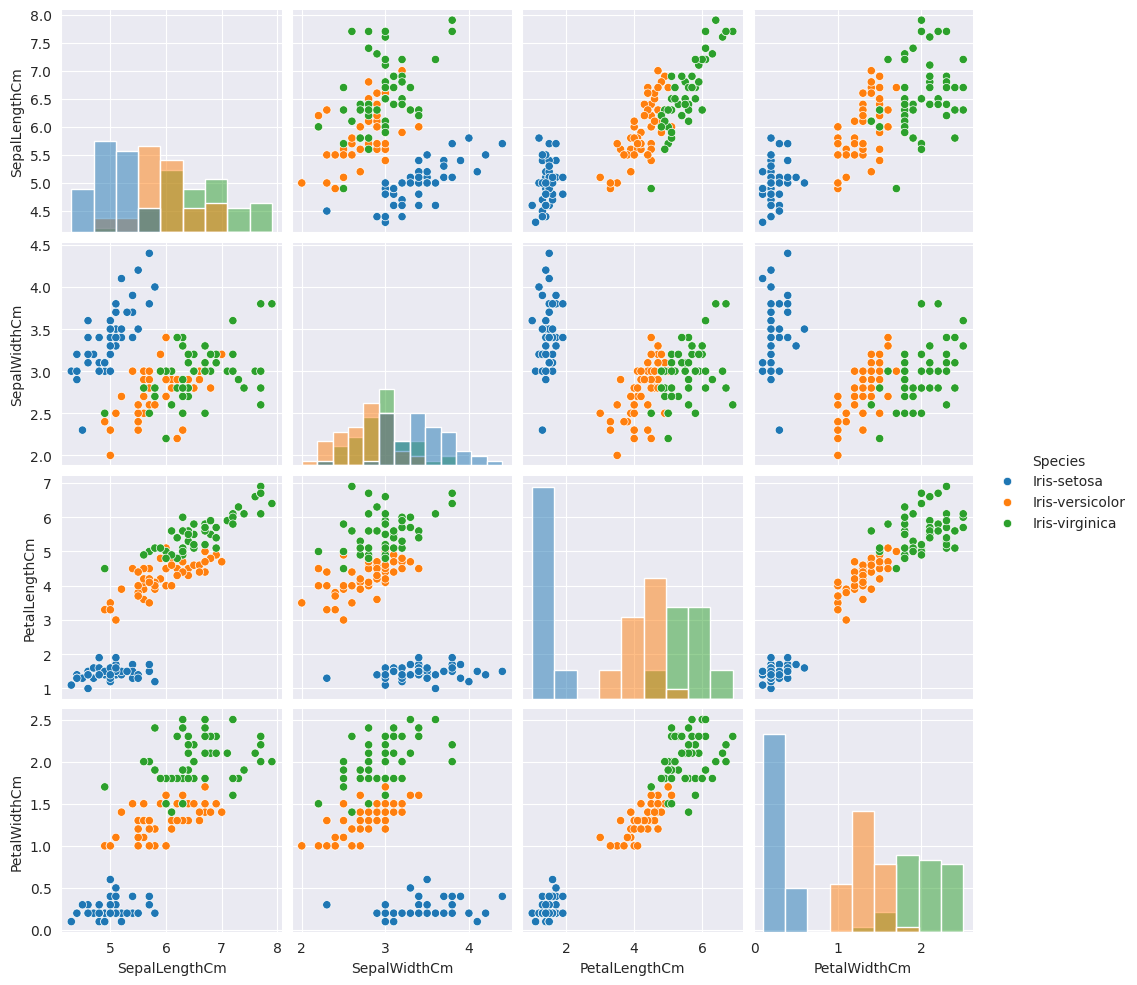

In [116]:

plt.figure(figsize=(12, 10))
sns.pairplot(iris, hue='Species', diag_kind='hist')
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

 Теперь на диагонали таблицы находятся гистограммы.  

 Гистограммы предоставляют более прямое представление о распределении данных по сравнению с KDE-графиками.
 KDE-графики дают гладкую оценку плотности, но могут сглаживать некоторые особенности распределения.
 Гистограммы показывают количество наблюдений в каждом интервале (бине), что может быть более информативно,
 когда нужно увидеть, сколько точек попадает в определенный диапазон.

 В данном случае, гистограммы на диагонали могут быть более информативны, так как дают более ясное представление о
 распределении данных, особенно в случаях, когда KDE-графики могут сгладить значимые особенности распределений.
 Однако, интерпретация гистограмм зависит от выбора ширины бинов, и для разных ширин гистограммы могут
 выглядеть по-разному, что может влиять на восприятие информации.